In [3]:
import math ; pi=math.pi
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
import time
import importlib

In [4]:
# Import PySSC module
import PySSC

In [120]:
# Redshift bins
zstakes = np.arange(0.2,1.6,step=0.1)
zbins = zstakes[:-1]+(zstakes[1:]-zstakes[:-1])/2
zmin = np.min(zstakes) ; zmax = np.max(zstakes)
# Window function
nz       = 500
z_arr    = np.linspace(0,2,num=nz+1)[1:] # Redshifts must be > 0
nbins_T   = len(zstakes)-1
windows_T = np.zeros((nbins_T,nz))
for i in range(nbins_T):
    zminbin = zstakes[i] ; zmaxbin = zstakes[i+1] ; Dz = zmaxbin-zminbin
    for iz in range(nz):
        z = z_arr[iz]
        if ((z>zminbin) and (z<=zmaxbin)):
            windows_T[i,iz] = 1/Dz
print(zstakes)

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]


## Comparison of Sij matrix for full sky and partial sky Sij for full-sky mask

In [7]:
# full sky Sij
t0 = time.clock()
print('Full sky Sij')
Sijw_full = PySSC.Sij(z_arr,windows_T)
# partial sky Sij with full-sky mask
t1 = time.clock()
print('Partial sky Sij')
Sijw_part = PySSC.Sij_psky(z_arr,windows_T,clmask=None,mask='./masks/full_sky_map.fits',verbose=True,debug=True) #long computation
t2 = time.clock()
print('Sij full sky took: %.1f secs, part sky %.1f secs' %(t1-t0,t2-t1))

Full sky Sij
Partial sky Sij
Using mask map, given as a fits file
f_sky = 1.0000
lmax = 0
0.5592684397699506
Debug: minmax of relative difference Cl_zero vs Cl_XY(ell=0) -18.639396346491868 12.936256192955405
Debug: fsky,ell,cl_mask 0.9999999999063067 [0] [12.56637061]
Debug: Sij computation 3.0804803775221597e-06 3.0804803775221605e-06
Sij full sky took: 3.6 secs, part sky 31.0 secs


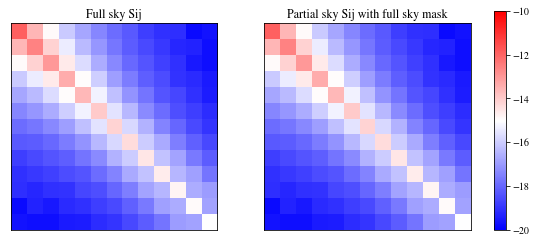

In [5]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(8,3.5))
im = axes[0].imshow(np.log(abs(Sijw_full)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im2 = axes[1].imshow(np.log(abs(Sijw_part)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Full sky Sij')
axes[1].set_title('Partial sky Sij with full sky mask')
fig.subplots_adjust(left=0.02,bottom=0.08,top=0.9,wspace=0.002)
cbar_ax = fig.add_axes([0.9, 0.08, 0.02, 0.87])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

100.0% of the part sky Sij bins are within 1% of the Sij full sky value


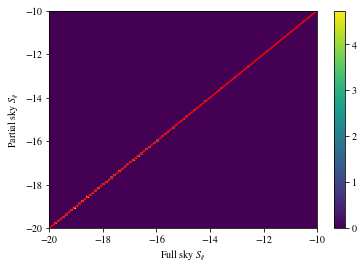

In [6]:
plt.figure()
plt.hist2d(np.log(abs(Sijw_full)).flatten(),np.log(abs(Sijw_part)).flatten(),bins=100,density=True,range=[[-20,-10],[-20,-10]])
plt.plot(np.linspace(-20,-10,100),np.linspace(-20,-10,100),color='r')
plt.xlabel(r'Full sky $S_{ij}$')
plt.ylabel(r'Partial sky $S_{ij}$')
plt.colorbar()

diff = (np.log(abs(Sijw_full)) - np.log(abs(Sijw_part)))/np.log(abs(Sijw_full)) *100
print('%.1f%% of the part sky Sij bins are within 1%% of the Sij full sky value' %(np.sum(diff<=1.)/(nbins_T+1)**2 *100))

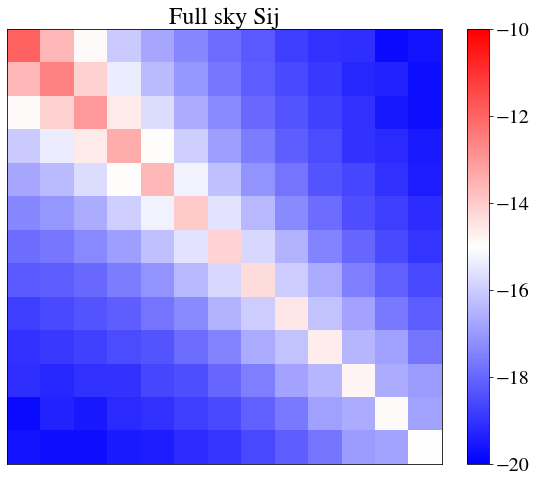

In [64]:
# Plotting the two matrices
fig = plt.figure(figsize=(9,8))
im = plt.imshow(np.log(abs(Sijw_full)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
plt.tick_params(axis='both',which='both', bottom=False, left=False,labelbottom=False,labelleft=False)
plt.title('Full sky Sij',fontsize=24)
c_bar=fig.colorbar(im,fraction=.05)
c_bar.ax.tick_params(labelsize=20)
plt.savefig('Full_sky_Sij_DES.png')

## Partial sky Sij for DES mask

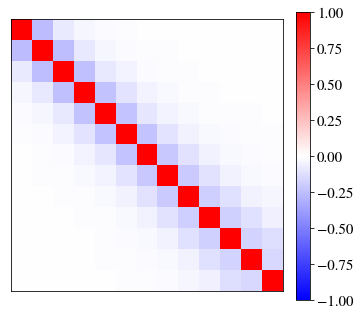

-0.2579056520376814


In [53]:
# Let's now plot the correlation matrix : Sij/sqrt(Sii*Sjj)
#Compute the correlation matrix
correlw_full = np.zeros((nbins_T,nbins_T))
for i in range(nbins_T):
    for j in range(nbins_T):
        correlw_full[i,j] = Sijw_full[i,j] / np.sqrt(Sijw_full[i,i]*Sijw_full[j,j])
#Plot it
fig = plt.figure(figsize=(5.5,5))
P = plt.imshow(correlw_full,interpolation='none',cmap='bwr',vmin=-1,vmax=1)
plt.xticks([]) ; plt.yticks([])
ax1 = fig.add_axes([0.89, 0.1, 0.035, 0.8])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()
print(correlw_full.min())

In [4]:
t0 = time.clock()
Sijw_part_DES = PySSC.Sij_psky(z_arr,windows_T,mask='./masks/DES-mask-simple-ring-1024.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.1207
lmax = 32
0.5592684397699506
Computed in 3.3 minutes


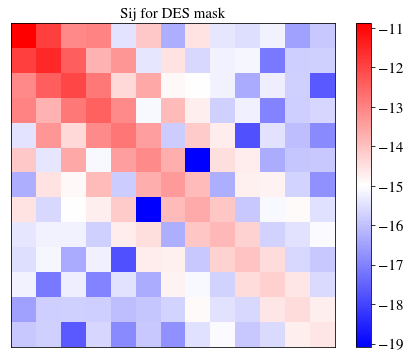

In [5]:
#Plotting
fig = plt.figure(figsize=(6.,5)) 
ax = fig.add_axes([0.05,0.05,0.75,0.9]) 
P = ax.imshow(np.log(abs(Sijw_part_DES)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin]) 
plt.xticks([]) ; plt.yticks([]) 
ax1 = fig.add_axes([0.85, 0.05, 0.035, 0.9]) 
cbar = plt.colorbar(P,ax1) 
cbar.ax.tick_params(labelsize=15) 
ax.set_title('Sij for DES mask',fontsize=15)
plt.show()

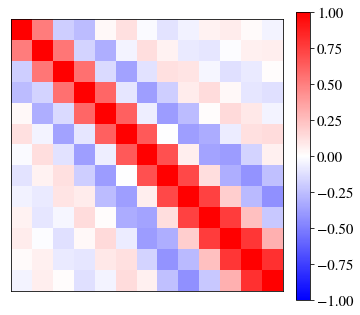

-0.4310825412491164


In [6]:
# Let's now plot the correlation matrix : Sij/sqrt(Sii*Sjj)
#Compute the correlation matrix
correlw_part_DES = np.zeros((nbins_T,nbins_T))
for i in range(nbins_T):
    for j in range(nbins_T):
        correlw_part_DES[i,j] = Sijw_part_DES[i,j] / np.sqrt(Sijw_part_DES[i,i]*Sijw_part_DES[j,j])
#Plot it
fig = plt.figure(figsize=(5.5,5))
P = plt.imshow(correlw_part_DES,interpolation='none',cmap='bwr',vmin=-1,vmax=1)
plt.xticks([]) ; plt.yticks([])
ax1 = fig.add_axes([0.89, 0.1, 0.035, 0.8])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()
print(correlw_part_DES.min())

### Comparison between Sij full sky rescaled by f_sky and partial sky Sij

(13, 13) 13 14
Mean relative difference: 6.02 %
Mean relative difference on the diagonal: 10.30 %


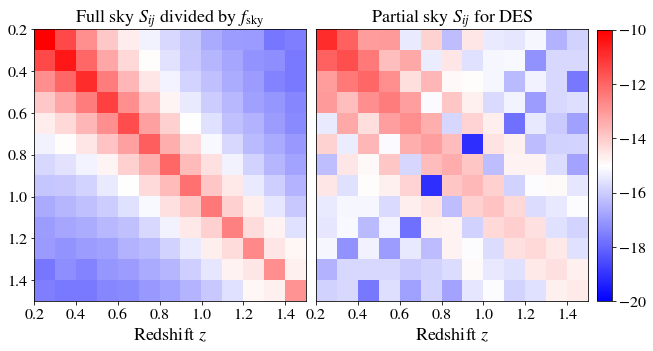

In [123]:
f_sky = 0.1207
print(Sijw_full.shape,nbins_T,len(zstakes))
# Plotting the two matrices
fig,axes=plt.subplots(1,2,figsize=(10,5),gridspec_kw={'wspace':0.02})
im = axes[0].imshow(np.log(abs(Sijw_full/f_sky)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
im2 = axes[1].imshow(np.log(abs(Sijw_part_DES)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-10)
axes[0].get_xaxis().set_ticks(zstakes[::2])
axes[0].get_yaxis().set_ticks(zstakes[::2])
axes[1].get_xaxis().set_ticks(zstakes[::2])
axes[1].get_yaxis().set_ticks([])
axes[0].set_title(r'Full sky $S_{ij}$ divided by $f_\mathrm{sky}$',fontsize=18)
axes[1].set_title('Partial sky $S_{ij}$ for DES',fontsize=18)
for ax in axes:
    ax.tick_params(labelsize=16)
    ax.set_xlabel(r'Redshift $z$',fontsize=18)
cbar_ax = fig.add_axes([0.91, 0.124, 0.02, 0.755])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=1)
c_bar.ax.tick_params(labelsize=16)
plt.savefig('Comparison_full_partsky_DES.png')

print('Mean relative difference: %.2f %%' %(np.mean(abs((np.log10(abs(Sijw_full/f_sky))-np.log10(abs(Sijw_part_DES)))/np.log10(abs(Sijw_part_DES))*100))))
print('Mean relative difference on the diagonal: %.2f %%' %(np.mean(abs((np.log10(abs(np.diag(Sijw_full)/f_sky))-np.log10(abs(np.diag(Sijw_part_DES))))/np.log10(abs(np.diag(Sijw_part_DES)))*100))))

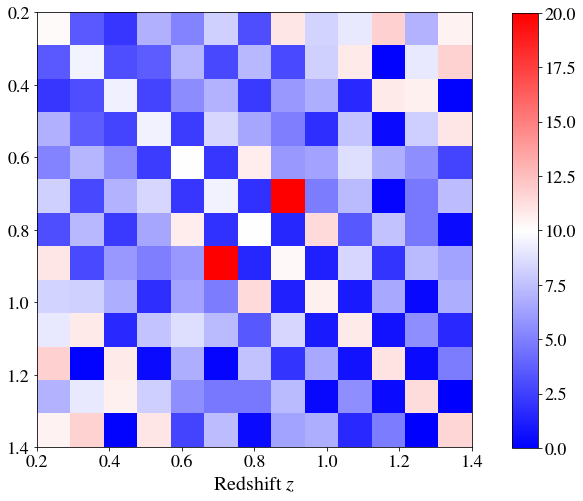

In [92]:
f_sky = 0.1207
# Plotting the two matrices
fig = plt.figure(figsize=(9,8))
im=plt.imshow(abs((np.log10(abs(Sijw_full/f_sky))-np.log10(abs(Sijw_part_DES)))/np.log10(abs(Sijw_part_DES))*100),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=0,vmax=20)
plt.xticks(zstakes[::2])
plt.yticks(zstakes[::2])
plt.tick_params(labelsize=18)
plt.xlabel(r'Redshift $z$',fontsize=20)
cbar_ax = fig.add_axes([0.91, 0.124, 0.04, 0.755])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=1)
c_bar.ax.tick_params(labelsize=18)
# plt.savefig('Comparison_full_partsky_DES.png')


88.2% of the part sky Sij bins are within 1% of the Sij full sky value


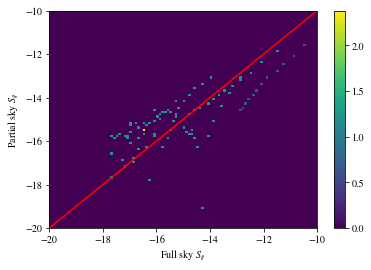

In [87]:
plt.figure()
plt.hist2d(np.log(abs(Sijw_full/f_sky)).flatten(),np.log(abs(Sijw_part_DES)).flatten(),bins=100,density=True,range=[[-20,-10],[-20,-10]])
plt.plot(np.linspace(-20,-10,100),np.linspace(-20,-10,100),color='r')
plt.xlabel(r'Full sky $S_{ij}$')
plt.ylabel(r'Partial sky $S_{ij}$')
plt.colorbar()

diff = (np.log(abs(Sijw_full)) - np.log(abs(Sijw_part)))/np.log(abs(Sijw_full)) *100
print('%.1f%% of the part sky Sij bins are within 1%% of the Sij full sky value' %(np.sum(diff<=10.)/(nbins_T+1)**2 *100))


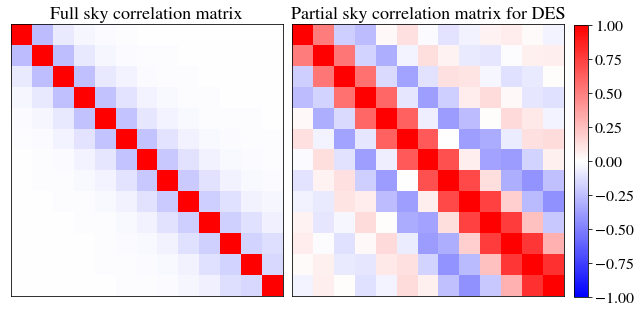

In [59]:
# Plotting the two matrices
fig,axes=plt.subplots(1,2,figsize=(10,5),gridspec_kw={'wspace':0.02})
im = axes[0].imshow(correlw_full,interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-1,vmax=1)
im2 = axes[1].imshow(correlw_part_DES,interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-1,vmax=1)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title(r'Full sky correlation matrix',fontsize=18)
axes[1].set_title('Partial sky correlation matrix for DES',fontsize=18)
cbar_ax = fig.add_axes([0.91, 0.124, 0.02, 0.755])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=1)
c_bar.ax.tick_params(labelsize=16)

## Partial sky Sij for Euclid mask

In [4]:
t0 = time.clock()
Sijw_part_Euclid = PySSC.Sij_psky(z_arr,windows_T,mask='./masks/Euclid_map_WIDE_SURVEY.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.3762
lmax = 27
Computed in 0.8 minutes


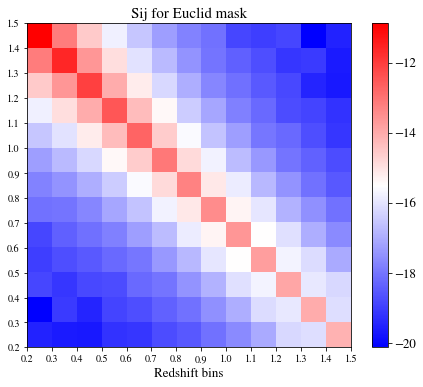

In [12]:
#Plotting
fig = plt.figure(figsize=(6.,5)) 
ax = fig.add_axes([0.05,0.1,0.75,0.85]) 
P = ax.imshow(np.log(abs(Sijw_part_Euclid)),interpolation='none',cmap='bwr',extent=(zmin,zmax,zmin,zmax)) 
plt.xlabel(r'Redshift bins',fontsize=13) 
plt.xticks(zstakes) 
plt.yticks(zstakes)
ax1 = fig.add_axes([0.85, 0.05, 0.035, 0.9]) 
cbar = plt.colorbar(P,ax1) 
cbar.ax.tick_params(labelsize=13) 
ax.set_title('Sij for Euclid mask',fontsize=15)
plt.show()

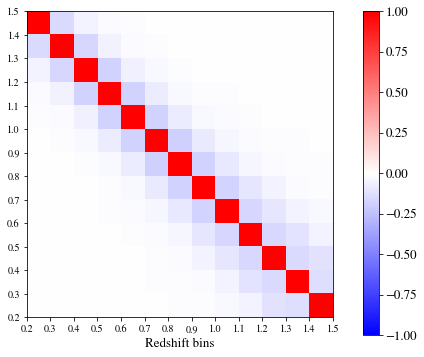

-0.1817668227431102


In [9]:
# Let's now plot the correlation matrix : Sij/sqrt(Sii*Sjj)
#Compute the correlation matrix
correlw_part_Euclid = np.zeros((nbins_T,nbins_T))
for i in range(nbins_T):
    for j in range(nbins_T):
        correlw_part_Euclid[i,j] = Sijw_part_Euclid[i,j] / np.sqrt(Sijw_part_Euclid[i,i]*Sijw_part_Euclid[j,j])
#Plot it
fig = plt.figure(figsize=(6,5))
ax = fig.add_axes([0.05,0.1,0.75,0.85]) 
P = ax.imshow(correlw_part_Euclid,interpolation='none',cmap='bwr',vmin=-1,vmax=1,extent=(zmin,zmax,zmin,zmax)) 
plt.xlabel(r'Redshift bins',fontsize=13) 
plt.xticks(zstakes) 
plt.yticks(zstakes)
ax1 = fig.add_axes([0.85, 0.05, 0.035, 0.9])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=13)
plt.show()
print(correlw_part_Euclid.min())

## Partial sky Sij for 5 degrees patch

In [129]:
t0 = time.clock()
Sijw_part_5d = PySSC.Sij_psky(z_arr,windows_T,mask='./masks/circular-mask_5deg.fits',verbose=True)
t1 = time.clock()
print('Computed in %.1f minutes' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.0019
lmax = 136
0.5592684397699506
Computed in 12.4 minutes


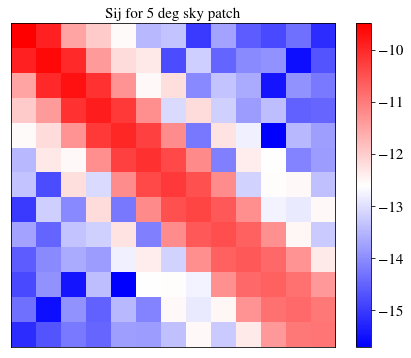

In [130]:
#Plotting
fig = plt.figure(figsize=(6.,5)) 
ax = fig.add_axes([0.05,0.05,0.75,0.9]) 
P = ax.imshow(np.log(abs(Sijw_part_5d)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin]) 
plt.xticks([]) ; plt.yticks([]) 
ax1 = fig.add_axes([0.85, 0.05, 0.035, 0.9]) 
cbar = plt.colorbar(P,ax1) 
cbar.ax.tick_params(labelsize=15) 
ax.set_title('Sij for 5 deg sky patch',fontsize=15)
plt.show()

(13,) 14


Text(0, 0.5, '$S_{ij}(z_1=0.5,z_2)$')

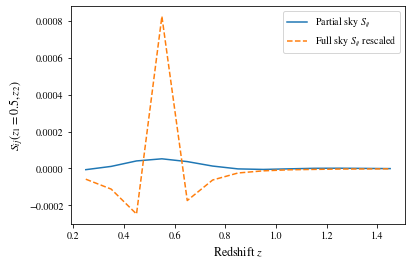

In [131]:
ii = 3
f_sky = 0.0019
print(Sijw_full[ii,:].shape,len(zstakes))
plt.figure()
plt.plot(zbins,Sijw_part_5d[ii,:],label=r'Partial sky $S_{ij}$')
plt.plot(zbins,Sijw_full[ii,:]/f_sky,label=r'Full sky $S_{ij}$ rescaled',ls='--')
plt.legend()
plt.xlabel(r'Redshift $z$',fontsize=12)
plt.ylabel(r'$S_{ij}(z_1=%.1f,z_2)$' %(zstakes[ii]),fontsize=12)

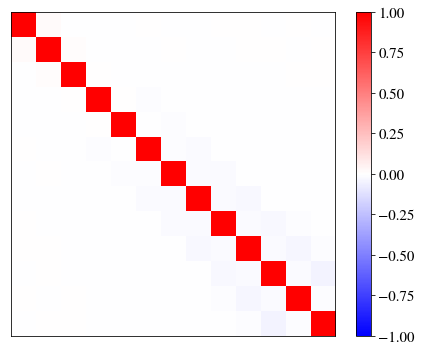

-0.04097177060332938


In [22]:
# Let's now plot the correlation matrix : Sij/sqrt(Sii*Sjj)
#Compute the correlation matrix
nzbins          = len(zstakes) - 1
correlw_part_5d = np.zeros((nbins_T,nbins_T))
for i in range(nbins_T):
    for j in range(nbins_T):
        correlw_part_5d[i,j] = Sijw_part_5d[i,j] / np.sqrt(Sijw_part_5d[i,i]*Sijw_part_5d[j,j])
#Plot it
fig = plt.figure(figsize=(6,5))
ax = fig.add_axes([0.05,0.05,0.75,0.9])
P = ax.imshow(correlw_part_5d,interpolation='none',cmap='bwr',vmin=-1,vmax=1)
plt.xticks([]) ; plt.yticks([])
ax1 = fig.add_axes([0.85, 0.05, 0.035, 0.9]) 
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()
print(correlw_part_5d.min())

# Most general case: Sijkl

### Comparison of results for full sky

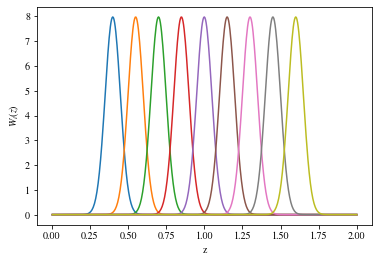

In [19]:
#Top-hat window functions have no interest here, since the cross-spectra would be basically zero
#So we go for Gaussian window functions
sigmaz    = 0.05
zcenter_G = [0.4,0.55,0.7,0.85,1.,1.15,1.3,1.45,1.6]
nbins_G   = len(zcenter_G)
windows_G = np.zeros((nbins_G,nz))
for i in range(nbins_G):
    windows_G[i,:] = np.exp(-(z_arr-zcenter_G[i])**2/(2*sigmaz**2)) / np.sqrt(2*pi*sigmaz**2)

# Plot window functions
for i in range(nbins_G):
    plt.plot(z_arr,windows_G[i,:])
plt.xlabel('z') ; plt.ylabel('$W_i(z)$')
plt.show()

In [5]:
#Top-hat window functions have no interest here, since the cross-spectra would be basically zero
#So we go for Gaussian window functions
t0 = time.clock()
Sijkl_full = PySSC.Sijkl(z_arr,windows_G)
t1 = time.clock()

Sijkl_psky = PySSC.Sijkl_psky(z_arr,windows_G,clmask=None,mask='./masks/full_sky_map.fits',verbose=True)
t2 = time.clock()
print('Sij full sky took: %.1f secs, part sky %.1f secs' %(t1-t0,t2-t1))

Using mask map, given as a fits file
f_sky = 1.0000
lmax = 0
Sij full sky took: 4.7 secs, part sky 27.1 secs


In [20]:
#Build indexing of pairs of redshift bins
npairs_G = (nbins_G*(nbins_G+1))//2
pairs_G  = np.zeros((2,npairs_G),dtype=int)
count       = 0
for ibin in range(nbins_G):
    for jbin in range(ibin,nbins_G):
        pairs_G[0,count] = ibin
        pairs_G[1,count] = jbin
        count +=1
#Recast Sijkl as a matrix of pairs, for later visualisation
Sijkl_full_recast = np.zeros((npairs_G,npairs_G))
Sijkl_psky_recast = np.zeros((npairs_G,npairs_G))
for ipair in range(npairs_G):
    ibin = pairs_G[0,ipair]
    jbin = pairs_G[1,ipair]
    for jpair in range(npairs_G):
        kbin = pairs_G[0,jpair]
        lbin = pairs_G[1,jpair]
        Sijkl_full_recast[ipair,jpair] = Sijkl_full[ibin,jbin,kbin,lbin]
        Sijkl_psky_recast[ipair,jpair] = Sijkl_psky[ibin,jbin,kbin,lbin]

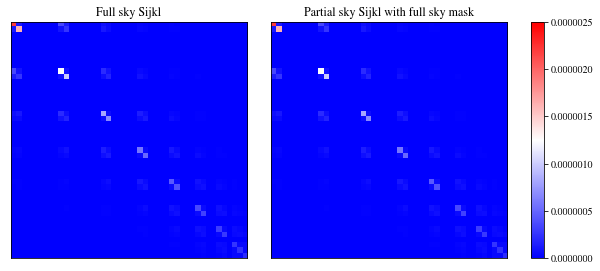

In [21]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(9,4))
im = axes[0].imshow(abs(Sijkl_full_recast),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=0,vmax=2.5e-6)
im2 = axes[1].imshow(abs(Sijkl_psky_recast),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=0,vmax=2.5e-6)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Full sky Sijkl')
axes[1].set_title('Partial sky Sijkl with full sky mask')
fig.subplots_adjust(left=0.03,bottom=0.08,top=0.9,right=0.83,wspace=0.01)
cbar_ax = fig.add_axes([0.85, 0.08, 0.02, 0.82])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

In [22]:
#Remove pairs of bins with zero covariance
invalid_list         = np.where(np.diag(Sijkl_psky_recast)==0)[0]
Sijkl_psky_recast_valid = np.delete(np.delete(Sijkl_psky_recast,invalid_list,0),invalid_list,1)
nvalid               = Sijkl_psky_recast_valid.shape[0]
print(nvalid)
invalid_list         = np.where(np.diag(Sijkl_full_recast)==0)[0]
Sijkl_full_recast_valid = np.delete(np.delete(Sijkl_full_recast,invalid_list,0),invalid_list,1)
nvalid               = Sijkl_full_recast_valid.shape[0]
print(nvalid)

17
17


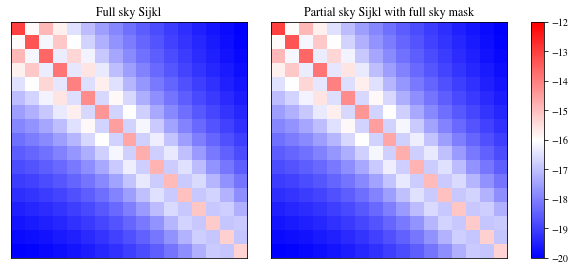

In [23]:
# Plotting the two matrices
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(9,4))
im = axes[0].imshow(np.log(abs(Sijkl_full_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
im2 = axes[1].imshow(np.log(abs(Sijkl_psky_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Full sky Sijkl')
axes[1].set_title('Partial sky Sijkl with full sky mask')
fig.subplots_adjust(left=0.03,bottom=0.08,top=0.9,right=0.83,wspace=0.01)
cbar_ax = fig.add_axes([0.85, 0.08, 0.02, 0.82])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

100.0% of the part sky Sij bins are within 1% of the Sij full sky value


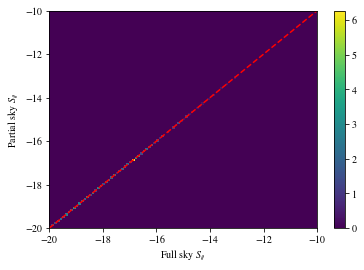

In [28]:
plt.figure()
plt.hist2d(np.log(abs(Sijkl_full_recast_valid)).flatten(),np.log(abs(Sijkl_psky_recast_valid)).flatten(),bins=100,density=True,range=[[-20,-10],[-20,-10]])
plt.plot(np.linspace(-20,-10,100),np.linspace(-20,-10,100),color='r',ls='--')
plt.xlabel(r'Full sky $S_{ij}$')
plt.ylabel(r'Partial sky $S_{ij}$')
plt.colorbar()

diff = (np.log(abs(Sijkl_full_recast_valid)) - np.log(abs(Sijkl_psky_recast_valid)))/np.log(abs(Sijkl_full_recast_valid)) *100
print('%.1f%% of the part sky Sij bins are within 1%% of the Sij full sky value' %(np.sum(diff<=1.)/nvalid**2 *100))

### Example: Partial sky Sijkl with Euclid mask

In [9]:
t0 = time.clock()
Sijkl_pskyE = PySSC.Sijkl_psky(z_arr,windows_G,clmask=None,mask='./masks/Euclid_map_WIDE_SURVEY.fits',verbose=True)
t1 = time.clock()
print('Sij part sky computed in %.1f mins' %((t1-t0)/60))

Using mask map, given as a fits file
f_sky = 0.3762
lmax = 27
Sij part sky computed in 1.1 mins


In [10]:
#Build indexing of pairs of redshift bins
npairs_G = (nbins_G*(nbins_G+1))//2
pairs_G  = np.zeros((2,npairs_G),dtype=int)
count       = 0
for ibin in range(nbins_G):
    for jbin in range(ibin,nbins_G):
        pairs_G[0,count] = ibin
        pairs_G[1,count] = jbin
        count +=1
#Recast Sijkl as a matrix of pairs, for later visualisation
Sijkl_pskyE_recast = np.zeros((npairs_G,npairs_G))
for ipair in range(npairs_G):
    ibin = pairs_G[0,ipair]
    jbin = pairs_G[1,ipair]
    for jpair in range(npairs_G):
        kbin = pairs_G[0,jpair]
        lbin = pairs_G[1,jpair]
        Sijkl_pskyE_recast[ipair,jpair] = Sijkl_pskyE[ibin,jbin,kbin,lbin]


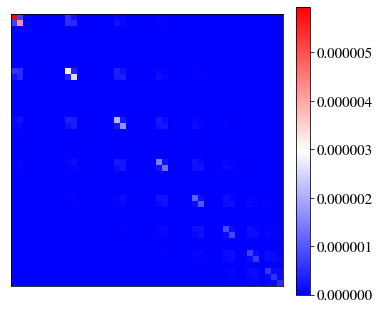

In [18]:
#Plot |Sijkl|
fig = plt.figure(figsize=(5.5,5))
P = plt.imshow(abs(Sijkl_pskyE_recast),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin])
plt.xticks([]) ; plt.yticks([])
P.axes.tick_params(labelsize=15)
ax1 = fig.add_axes([0.89, 0.1, 0.035, 0.8])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()

In [11]:
#Remove pairs of bins with zero covariance
invalid_list         = np.where(np.diag(Sijkl_pskyE_recast)==0)[0]
Sijkl_pskyE_recast_valid = np.delete(np.delete(Sijkl_pskyE_recast,invalid_list,0),invalid_list,1)
nvalid               = Sijkl_pskyE_recast_valid.shape[0]

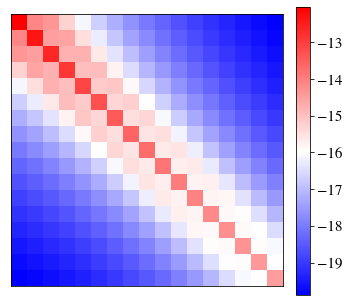

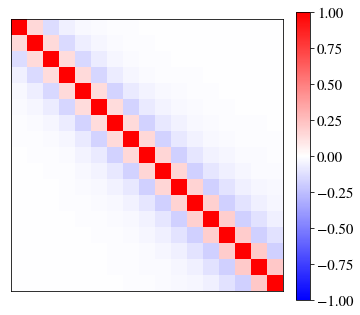

-0.18524493066567962


In [12]:
#Plot ln|Sijkl|
fig = plt.figure(figsize=(5.5,5))
P = plt.imshow(np.log(abs(Sijkl_pskyE_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin])
P.axes.tick_params(labelsize=15)
plt.xticks([]) ; plt.yticks([])
ax1 = fig.add_axes([0.89, 0.1, 0.035, 0.8])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()
#Second plot the correlation matrix
correl_ijkl_pskyE= np.zeros((nvalid,nvalid))
for i in range(nvalid):
    for j in range(nvalid):
        correl_ijkl_pskyE[i,j] = Sijkl_pskyE_recast_valid[i,j] / np.sqrt(Sijkl_pskyE_recast_valid[i,i]*Sijkl_pskyE_recast_valid[j,j])
fig = plt.figure(figsize=(5.5,5))
P = plt.imshow(correl_ijkl_pskyE,interpolation='none',cmap='bwr',vmin=-1,vmax=1,extent=[zmin,zmax,zmax,zmin])
plt.xticks([]) ; plt.yticks([])
P.axes.tick_params(labelsize=15)
ax1 = fig.add_axes([0.89, 0.1, 0.035, 0.8])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=15)
plt.show()
print(correl_ijkl_pskyE.min())

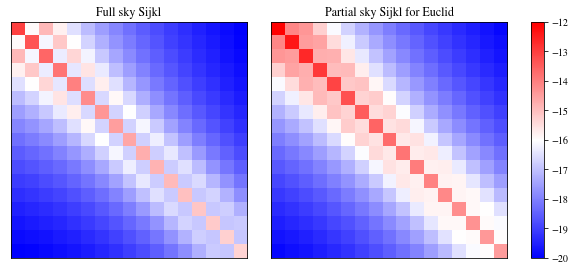

In [13]:
# Compare to full sky
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(9,4))
im = axes[0].imshow(np.log(abs(Sijkl_full_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
im2 = axes[1].imshow(np.log(abs(Sijkl_pskyE_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title('Full sky Sijkl')
axes[1].set_title('Partial sky Sijkl for Euclid')
fig.subplots_adjust(left=0.03,bottom=0.08,top=0.9,right=0.83,wspace=0.01)
cbar_ax = fig.add_axes([0.85, 0.08, 0.02, 0.82])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

Mean ratio of elements of psky to rescaled full sky: 0.71
Mean ratio of diagonal elements of psky to rescaled full sky: 0.94


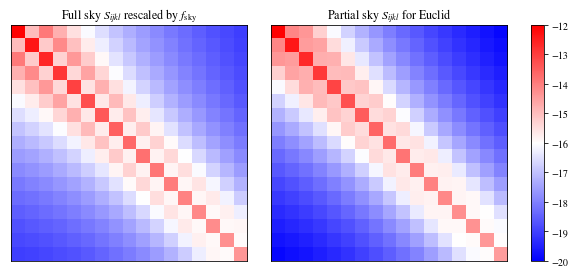

In [36]:
# Compare to full sky rescaled by f_sky
f_sky = 0.3762

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(9,4))
im = axes[0].imshow(np.log(abs(Sijkl_full_recast_valid/f_sky)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
im2 = axes[1].imshow(np.log(abs(Sijkl_pskyE_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title(r'Full sky $S_{ijkl}$ rescaled by $f_\mathrm{sky}$')
axes[1].set_title(r'Partial sky $S_{ijkl}$ for Euclid')
fig.subplots_adjust(left=0.03,bottom=0.08,top=0.9,right=0.83,wspace=0.01)
cbar_ax = fig.add_axes([0.85, 0.08, 0.02, 0.82])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

print('Mean ratio of elements of psky to rescaled full sky: %.2f' %(np.mean(Sijkl_pskyE_recast_valid/(Sijkl_full_recast_valid/f_sky))))
print('Mean ratio of diagonal elements of psky to rescaled full sky: %.2f' %(np.mean(np.diag(Sijkl_pskyE_recast_valid/(Sijkl_full_recast_valid/f_sky)))))

# Euclid redshift bins

In [3]:
prefix_Euclid='./Euclid_files/'

## Photometric bins

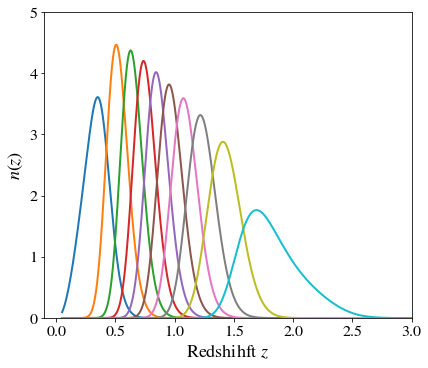

In [4]:
zarr = np.loadtxt(prefix_Euclid+'n_z_without_1_plus_z.dat',unpack=True,usecols=(0))[100:]
window = np.loadtxt(prefix_Euclid+'n_z_without_1_plus_z.dat',unpack=True,usecols=(1,2,3,4,5,6,7,8,9,10))[:,100:]
nbins = window.shape[0]
zbins = zarr[np.argmax(window,axis=1)]
fig = plt.figure(figsize=(6,5))
ax = fig.add_axes([0.1,0.12,0.85,0.85]) 
for u,zbin in enumerate(window):
	plt.plot(zarr,zbin,linewidth=2)
plt.xlabel(r'Redshihft $z$',fontsize=18) ; plt.xticks(fontsize=15)
plt.ylabel(r'$n(z)$',fontsize=18)
# plt.legend(frameon='False',loc='best')
plt.xlim([-0.1,3])
plt.ylim(0,5)
plt.tick_params(labelsize=16)
plt.savefig(prefix_Euclid+'n_z_Euclid_GCphot.png')
plt.show()

In [5]:
print(zarr)

[0.05   0.0505 0.051  ... 3.73   3.7305 3.731 ]


In [141]:
# partial sky Sijkl with Euclid mask
t1 = time.clock()
print('Computing partial sky Sijkl for Euclid...')
Sijkl1 = PySSC.Sijkl_psky(zarr,window,clmask=None,mask='./masks/Euclid_map_WIDE_SURVEY.fits') 
t2 = time.clock()
print('Sij took %.1f mins' %((t2-t1)/60))

Computing partial sky Sijkl for Euclid...
Sij took 3.2 mins


55 39
[ 5  6  7  8  9 15 16 17 18 24 25 26 32 33 39 44] 39


Text(0.5, 1.0, 'Sijkl for Euclid')

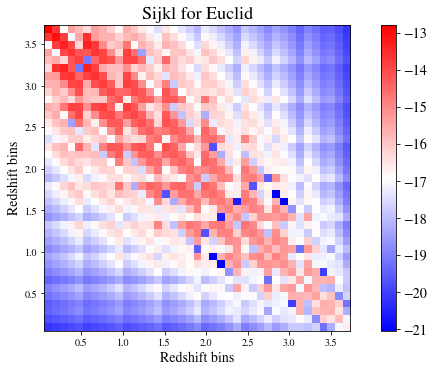

In [167]:
#Build indexing of pairs of redshift bins
npairs = (nbins*(nbins+1))//2
pairs  = np.zeros((2,npairs),dtype=int)
count  = 0
for ibin in range(nbins):
    for jbin in range(ibin,nbins):
        pairs[0,count] = ibin
        pairs[1,count] = jbin
        count +=1
#Recast Sijkl as a matrix of pairs, for later visualisation
Sijkl_psky_recast = np.zeros((npairs,npairs))
for ipair in range(npairs):
    ibin = pairs[0,ipair]
    jbin = pairs[1,ipair]
    for jpair in range(npairs):
        kbin = pairs[0,jpair]
        lbin = pairs[1,jpair]
        Sijkl_psky_recast[ipair,jpair] = Sijkl1[ibin,jbin,kbin,lbin]

#Remove pairs of bins with zero covariance
invalid_list         = np.where(np.diag(Sijkl_psky_recast)==0)[0]
m = np.diag(Sijkl_psky_recast)!=0
Sijkl_psky_recast_valid = np.delete(np.delete(Sijkl_psky_recast,invalid_list,0),invalid_list,1)
nvalid               = Sijkl_psky_recast_valid.shape[0]
print(npairs,nvalid)
# print(invalid_list,np.sum(m))

fig = plt.figure(figsize=(6.,5)) 
ax = fig.add_axes([0.05,0.1,0.75,0.85]) 
P = ax.imshow(np.log(abs(Sijkl_psky_recast_valid)),interpolation='none',cmap='bwr',extent=(np.min(zarr),np.max(zarr),np.min(zarr),np.max(zarr))) 
plt.xlabel(r'Redshift bins',fontsize=14); plt.ylabel(r'Redshift bins',fontsize=14)
# for zbin in zbins:
#     plt.axvline(zbin,color='k')
#     plt.axhline(zbin,color='k')
ax1 = fig.add_axes([0.85, 0.1, 0.035, 0.85]) 
cbar = plt.colorbar(P,ax1) 
cbar.ax.tick_params(labelsize=14) 
# ax.set_title('Sijkl for Euclid',fontsize=18)

-0.19835298897711823
(39, 39) [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.1 3.2 3.3 3.4
 3.5 3.6 3.7] 0.05 3.7310000000000003
[0.0, 1.0, 2.0, 3.0]


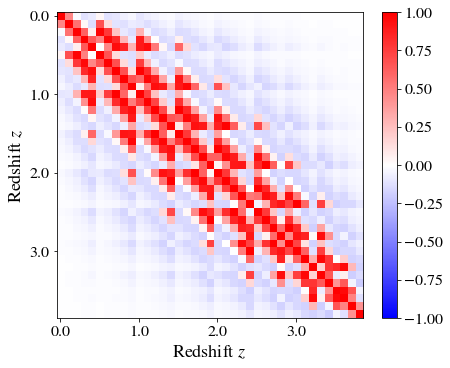

In [196]:
#Second plot the correlation matrix
correl_ijkl_psky= np.zeros((nvalid,nvalid))
for i in range(nvalid):
    for j in range(nvalid):
        correl_ijkl_psky[i,j] = Sijkl_psky_recast_valid[i,j] / np.sqrt(Sijkl_psky_recast_valid[i,i]*Sijkl_psky_recast_valid[j,j])

fig = plt.figure(figsize=(6,5))
ax = fig.add_axes([0.05,0.12,0.8,0.85]) 
# P = ax.imshow(correl_ijkl_psky,interpolation='none',cmap='bwr',vmin=-1,vmax=1,extent=[np.min(zarr),np.max(zarr),np.max(zarr),np.min(zarr)])
P = ax.imshow(correl_ijkl_psky,interpolation='none',cmap='bwr',vmin=-1,vmax=1)
# plt.xticks([]) ; plt.yticks([])
#plt.xlabel(r'Redshift bins',fontsize=14); plt.ylabel(r'Redshift bins',fontsize=14) 
#plt.title('Correlation matrix for Euclid',fontsize=18)
# ax2 = ax.twinx()
# for zbin in window:
#     ax2.plot(zarr,zbin,color='k',lw=.8)
# P.axes.tick_params(labelsize=15)
zticks = np.round(np.linspace(np.min(zarr),np.max(zarr),correl_ijkl_psky.shape[0]),decimals=1)
plt.xticks([0,10,20,30],labels=[zticks[i] for i in [0,10,20,30]])
plt.yticks([0,10,20,30],labels=[zticks[i] for i in [0,10,20,30]])
plt.xlabel(r'Redshift $z$',fontsize=18)
plt.ylabel(r'Redshift $z$',fontsize=18)
plt.tick_params(labelsize=16)
ax1 = fig.add_axes([0.85, 0.12, 0.035, 0.85])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=16)
print(correl_ijkl_psky.min())
plt.savefig(prefix_Euclid+'Correlation_matrix_Euclid_GCphot.png',bbox_inches='tight')

print(correl_ijkl_psky.shape,zticks,np.min(zarr),np.max(zarr))
print([zticks[i] for i in [0,10,20,30]])

In [29]:
# Compare to full sky rescaled by f_sky
f_sky = 0.3762
Sijkl_full_Euclid = PySSC.Sijkl(zarr,window)

#Build indexing of pairs of redshift bins
npairs = (nbins*(nbins+1))//2
pairs  = np.zeros((2,npairs),dtype=int)
count       = 0
for ibin in range(nbins):
    for jbin in range(ibin,nbins):
        pairs[0,count] = ibin
        pairs[1,count] = jbin
        count +=1
#Recast Sijkl as a matrix of pairs, for later visualisation
Sijkl_full_Euclid_recast = np.zeros((npairs,npairs))
for ipair in range(npairs):
    ibin = pairs[0,ipair]
    jbin = pairs[1,ipair]
    for jpair in range(npairs):
        kbin = pairs[0,jpair]
        lbin = pairs[1,jpair]
        Sijkl_full_Euclid_recast[ipair,jpair] = Sijkl1[ibin,jbin,kbin,lbin]

#Remove pairs of bins with zero covariance
invalid_list         = np.where(np.diag(Sijkl_full_Euclid_recast)==0)[0]
Sijkl_full_Euclid_recast_valid = np.delete(np.delete(Sijkl_full_Euclid_recast,invalid_list,0),invalid_list,1)
nvalid               = Sijkl_full_Euclid_recast_valid.shape[0]
print(npairs,nvalid)

55 39


Mean ratio of elements of psky to rescaled full sky: 0.38
Mean ratio of diagonal elements of psky to rescaled full sky: 0.38


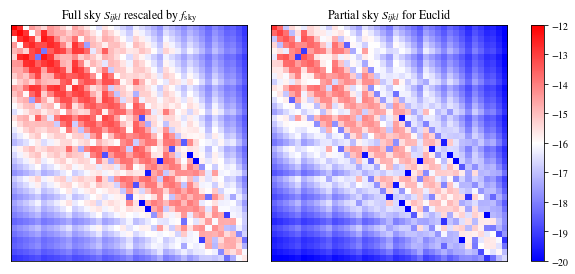

In [32]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(9,4))
im = axes[0].imshow(np.log(abs(Sijkl_full_Euclid_recast_valid/f_sky)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
im2 = axes[1].imshow(np.log(abs(Sijkl_psky_recast_valid)),interpolation='none',cmap='bwr',extent=[zmin,zmax,zmax,zmin],vmin=-20,vmax=-12)
for ax in axes:
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
axes[0].set_title(r'Full sky $S_{ijkl}$ rescaled by $f_\mathrm{sky}$')
axes[1].set_title(r'Partial sky $S_{ijkl}$ for Euclid')
fig.subplots_adjust(left=0.03,bottom=0.08,top=0.9,right=0.83,wspace=0.01)
cbar_ax = fig.add_axes([0.85, 0.08, 0.02, 0.82])
c_bar=fig.colorbar(im,cax=cbar_ax,fraction=.5)

print('Mean ratio of elements of psky to rescaled full sky: %.2f' %(np.mean(Sijkl_psky_recast_valid/(Sijkl_full_Euclid_recast_valid/f_sky))))
print('Mean ratio of diagonal elements of psky to rescaled full sky: %.2f' %(np.mean(np.diag(Sijkl_psky_recast_valid/(Sijkl_full_Euclid_recast_valid/f_sky)))))

## Spectrometry

In [48]:
#GCs
zmins = np.array([0.90,1.10,1.30,1.50])
zmaxs = np.array([1.10,1.30,1.50,1.80])
n_zs = np.array([6.86,5.58,4.21,2.61])* 1e-4
zbins = np.array([1.00,1.20,1.40,1.65])
zmin = np.min(zmins) ; zmax = np.max(zmaxs)
zstakes    = np.r_[zmins,zmaxs[-1]]

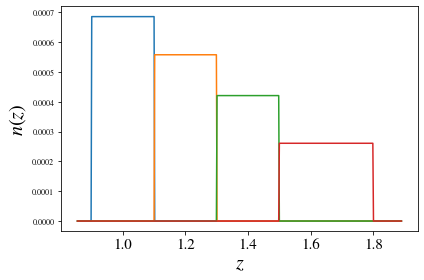

In [53]:
# Define redshift range
nz       = 500
z_arr    = np.linspace(0.95*zmin,zmax*1.05,num=nz)

nbins2   = zmins.size
windows2 = np.zeros((nbins2,nz))
for i in range(nbins2):
    zminbin = zmins[i] ; zmaxbin = zmaxs[i] ; Dz = zmaxbin-zminbin
    for iz,z in enumerate(z_arr):
        if ((z>zminbin) and (z<=zmaxbin)):
            windows2[i,iz] = n_zs[i]

plt.figure()
for i in range(nbins2):   
    plt.plot(z_arr,windows2[i,:])
plt.xlabel(r'$z$',fontsize=20)
plt.ylabel(r'$n(z)$',fontsize=20)
plt.xticks(fontsize=15) ; plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig(prefix_Euclid+'n_z_Euclid_GCs.png')

In [50]:
# partial sky Sijkl with Euclid mask
t1 = time.clock()
print('Computing partial sky Sijkl for Euclid...')
Sijkl2 = PySSC.Sijkl_psky(z_arr,windows2,clmask=None,mask='./masks/Euclid_map_WIDE_SURVEY.fits') 
t2 = time.clock()
print('Sijkl took %.1f secs' %(t2-t1))

Computing partial sky Sijkl for Euclid...
Sijkl took 20.9 secs


4
0.9 1.8


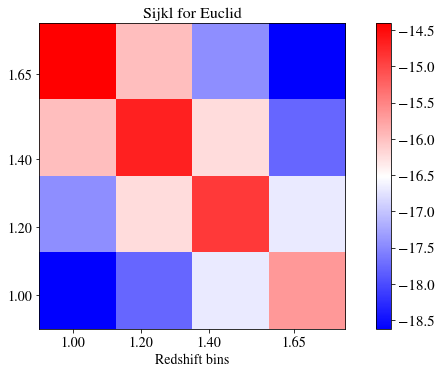

In [51]:
#Build indexing of pairs of redshift bins
npairs = (nbins2*(nbins2+1))//2
pairs  = np.zeros((2,npairs),dtype=int)
count       = 0
for ibin in range(nbins2):
    for jbin in range(ibin,nbins2):
        pairs[0,count] = ibin
        pairs[1,count] = jbin
        count +=1
#Recast Sijkl as a matrix of pairs, for later visualisation
Sijkl_psky_recast2 = np.zeros((npairs,npairs))
for ipair in range(npairs):
    ibin = pairs[0,ipair]
    jbin = pairs[1,ipair]
    for jpair in range(npairs):
        kbin = pairs[0,jpair]
        lbin = pairs[1,jpair]
        Sijkl_psky_recast2[ipair,jpair] = Sijkl2[ibin,jbin,kbin,lbin]

#Remove pairs of bins with zero covariance
invalid_list         = np.where(np.diag(Sijkl_psky_recast2)==0)[0]
Sijkl_psky_recast_valid2 = np.delete(np.delete(Sijkl_psky_recast2,invalid_list,0),invalid_list,1)
nvalid               = Sijkl_psky_recast_valid2.shape[0]
print(nvalid)

fig = plt.figure(figsize=(6.,5)) 
ax = fig.add_axes([0.05,0.1,0.75,0.85]) 
P = ax.imshow(np.log(abs(Sijkl_psky_recast_valid2)),interpolation='none',cmap='bwr',extent=(zmin,zmax,zmin,zmax)) 
plt.xlabel(r'Redshift bins',fontsize=14) 
plt.xticks(zbins,fontsize=14); plt.yticks(zbins,fontsize=14)
ax1 = fig.add_axes([0.85, 0.1, 0.035, 0.85]) 
cbar = plt.colorbar(P,ax1) 
cbar.ax.tick_params(labelsize=15) 
ax.set_title('Sijkl for Euclid',fontsize=16)
print(zmin,zmax)

-0.24456646341927274


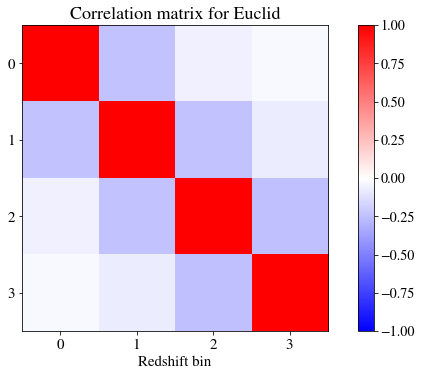

In [52]:
#Second plot the correlation matrix
correl_ijkl_psky2= np.zeros((nvalid,nvalid))
for i in range(nvalid):
    for j in range(nvalid):
        correl_ijkl_psky2[i,j] = Sijkl_psky_recast_valid2[i,j] / np.sqrt(Sijkl_psky_recast_valid2[i,i]*Sijkl_psky_recast_valid2[j,j])

fig = plt.figure(figsize=(6.,5))
ax = fig.add_axes([0.05,0.1,0.75,0.85]) 
#P = ax.imshow(correl_ijkl_psky2,interpolation='none',cmap='bwr',vmin=-1,vmax=1,extent=[zmin,zmax,zmax,zmin])
P = ax.imshow(correl_ijkl_psky2,interpolation='none',cmap='bwr',vmin=-1,vmax=1)
plt.xlabel(r'Redshift bin',fontsize=15) #; plt.ylabel(r'Redshift bin',fontsize=15) 
#plt.xticks(zbins,fontsize=14); plt.yticks(zbins,fontsize=14)
plt.xticks(range(4),fontsize=14); plt.yticks(range(4),fontsize=14)
plt.title('Correlation matrix for Euclid',fontsize=18)
P.axes.tick_params(labelsize=15)
ax1 = fig.add_axes([0.85, 0.1, 0.035, 0.85])
cbar = plt.colorbar(P,ax1)
cbar.ax.tick_params(labelsize=14)
print(correl_ijkl_psky2.min())
plt.savefig(prefix_Euclid+'Correlation_matrix_Euclid_GCs.png')

## Comparison to flat-sky approximation

In [1]:
# Top-hat window functions

zstakes = np.arange(0.2,1.6,step=0.1)
zbins = zstakes[:-1]+(zstakes[1:]-zstakes[:-1])/2
zmin = np.min(zstakes) ; zmax = np.max(zstakes)

nz       = 500
z_arr    = np.linspace(0,2,num=nz+1)[1:] # Redshifts must be > 0
nbins_T   = len(zstakes)-1
windows_T = np.zeros((nbins_T,nz))
for i in range(nbins_T):
    zminbin = zstakes[i] ; zmaxbin = zstakes[i+1] ; Dz = zmaxbin-zminbin
    for iz in range(nz):
        z = z_arr[iz]
        if ((z>zminbin) and (z<=zmaxbin)):
            windows_T[i,iz] = 1/Dz

In [5]:
# Partial sky Sij
print('Computing partial sky Sij')
Sijw_part = PySSC.Sij_psky(z_arr,windows_T,clmask=None,mask='./masks/circular-mask_5deg.fits',verbose=False)

Computing partial sky Sij
0.5592684397699506


In [6]:
# Flat-sky approximation
print('Computing flat-sky approximation')

from scipy.special import spherical_jn as jn
from scipy.special import jv as Jn
from classy import Class 
import healpy as hp
from scipy import integrate

#COSMOLOGY
h = 0.6774
Om_0 = 0.309
Ol_0 = 0.691
Ob_0 = 0.049
obh2 = Ob_0 * h**2
och2 = (Om_0 - Ob_0) * h**2
n_S = 0.96
sigma8 = 0.81
cosmo_params = {'omega_b':obh2,'omega_cdm':och2,'H0':h*100.,'n_s':n_S,'sigma8':sigma8}
# CLASS
cosmo = Class()
dico_for_CLASS = cosmo_params
dico_for_CLASS['output'] = 'mPk'
cosmo.set(dico_for_CLASS)
cosmo.compute()

#mask
theta = 5.*np.pi/180. #5 deg

# Sij computation

zz  = np.asarray(z_arr)
nz    = len(zz)
zofr = cosmo.z_of_r(zz)
comov_dist  = zofr[0]  #comoving distances in Mpc

win = np.asarray(windows_T)
nbins = win.shape[0]

keq         = 0.02/h                                          #Equality matter radiation in 1/Mpc (more or less)
klogwidth   = 10                                              #Factor of width of the integration range. 10 seems ok
kmin        = min(keq,1./comov_dist.max())/klogwidth
kmax        = max(keq,1./comov_dist.min())*klogwidth

# kperp array
kmin_perp = kmin
kmax_perp = kmax
nk_perp   = 50
lnkperp_arr = np.linspace(np.log10(kmin_perp),np.log10(kmax_perp),nk_perp)
kperp_arr = np.exp(lnkperp_arr)
# kpar array
kmin_par = kmin
kmax_par = kmax
nk_par 	 = 50
lnkpar_arr = np.linspace(np.log10(kmin_par),np.log10(kmax_par),nk_par)
kpar_arr = np.exp(lnkpar_arr)
# k2 = kperp2 + kpar2
k_arr = np.sqrt(kperp_arr[:,None]**2+kpar_arr[None,:]**2)
# fill Sij
t0 = time.time()
Sij = np.zeros((nbins,nbins))
for ibin in range(nbins):
	z1 = zstakes[ibin]
	r1 = cosmo.z_of_r([z1])[0][0]
	dr1 = comov_dist[win[ibin,:]!=0].max()-comov_dist[win[ibin,:]!=0].min() #width of function function

	for jbin in range(nbins):
		z2 = zstakes[jbin]
		r2 = cosmo.z_of_r([z2])[0][0]
		dr2 = comov_dist[win[jbin,:]!=0].max()-comov_dist[win[jbin,:]!=0].min() #width of window function

		z12 = np.mean([zstakes[ibin],zstakes[jbin]])

		
		Pk = np.array([cosmo.pk(k_arr[i,j],0.) for i in range(nk_perp) for j in range(nk_par)])
		Pk = Pk.reshape(k_arr.shape)

		integ_kperp = kperp_arr * 4. * (Jn(1,kperp_arr*theta*r1)/kperp_arr/theta/r1) * ( Jn(1,kperp_arr*theta*r2)/kperp_arr/theta/r2 )
		integ_kpar = jn(0,kpar_arr*dr1/2) * jn(0,kpar_arr*dr2/2)
		dSij = integ_kperp[:,None] * integ_kpar[None,:] * Pk * np.cos(kpar_arr[None,:]*abs(r1-r2)) 

		Sij[ibin,jbin] = integrate.simps( integrate.simps(dSij,kpar_arr), kperp_arr)/ 2. / np.pi**2
t1=time.time()
print('Computed in %.1f secs' %((t1-t0)))

Computing flat-sky approximation
Computed in 1.6 secs


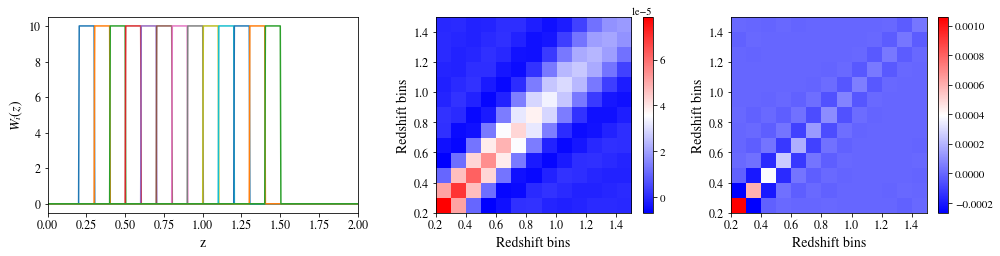

In [7]:
# plot results
fig,axes = plt.subplots(1,3,figsize=(14,3.6),gridspec_kw={'width_ratios':(4,3,3)})
for ibin in range(nbins):   
    axes[0].plot(z_arr,windows_T[ibin,:])
axes[0].set_xlabel('z',fontsize=14); axes[0].set_ylabel('$W_i(z)$',fontsize=14)
axes[0].tick_params(labelsize=12)
axes[0].set_xlim(0,2)
im = axes[1].imshow(Sijw_part,interpolation='none',cmap='bwr',origin='lower',extent=(zmin,zmax,zmin,zmax))
cbar = plt.colorbar(im,ax=axes[1],fraction=0.045); cbar.ax.tick_params(labelsize=11)
im2 = axes[2].imshow(Sij,interpolation='none',cmap='bwr',origin='lower',extent=(zmin,zmax,zmin,zmax))
cbar2 = plt.colorbar(im2,ax=axes[2],fraction=0.045); cbar2.ax.tick_params(labelsize=11)
for i in range(1,3):
    axes[i].set_xlabel(r'Redshift bins',fontsize=14); axes[i].set_ylabel(r'Redshift bins',fontsize=14)
    axes[i].set_yticks(zstakes[::2]); axes[i].set_xticks(zstakes[::2])
    axes[i].tick_params(labelsize=12)
fig.tight_layout()
fig.savefig('flat-sky_5deg.png')

In [8]:
np.mean((np.diag(Sij)-np.diag(Sijw_part))/np.diag(Sijw_part))

3.233033934682974

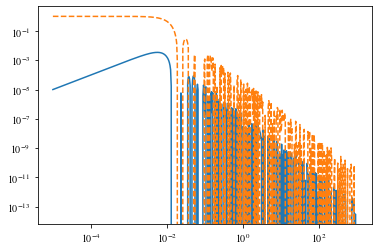

In [9]:
k = np.logspace(-5,3,500)

z1 = 0.5
r1 = cosmo.z_of_r([z1])[0][0]
dr1 = cosmo.z_of_r([z1-0.05])[0][0]-cosmo.z_of_r([z1+0.05])[0][0] #width of function function

z2 = 1.0
r2 = cosmo.z_of_r([z2])[0][0]
dr2 = cosmo.z_of_r([z2-0.05])[0][0]-cosmo.z_of_r([z2+0.05])[0][0] #width of function function

integ_kperp = k * 4. * (Jn(1,k*theta*r1)/k/theta/r1) * ( Jn(1,k*theta*r2)/k/theta/r2 )
integ_kpar = jn(0,k*dr1/2) * jn(0,k*dr2/2)

plt.figure()
plt.loglog(k,integ_kperp)
plt.loglog(k,integ_kpar,ls='--')